<a href="https://colab.research.google.com/github/RawanKhaled20/CodeCasa/blob/main/Housing_Prices_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rawankhaled20","key":"f5a17aecb67ca4675b425dadbe4ab60e"}'}

In [3]:
!mkdir -p ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets list

ref                                                        title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                    Most Streamed Spotify Songs 2023              47KB  2023-08-26 11:04:57          12901        417  1.0              
joebeachcapital/students-performance                       Students Performance                           2KB  2023-08-31 00:50:11           4359        115  1.0              
taeefnajib/used-car-price-prediction-dataset               Used Car Price Prediction Dataset            109KB  2023-09-15 12:58:57            556         23  1.0              
carlmcbrideellis/zzzs-lightweight-training-dataset-target  Zzzs: Lightweight training dataset + target  185MB  2023-09-2

In [6]:
!kaggle datasets download -d altavish/boston-housing-dataset

  0% 0.00/11.7k [00:00<?, ?B/s]
100% 11.7k/11.7k [00:00<00:00, 24.5MB/s]


In [7]:
! unzip boston-housing-dataset.zip

Archive:  boston-housing-dataset.zip
  inflating: HousingData.csv         


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
Data_Read=pd.read_csv("HousingData.csv")

In [10]:
Data_Read

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [11]:
#Remove NAN values
Data_Read.dropna(inplace=True)

In [13]:
Data_Read.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

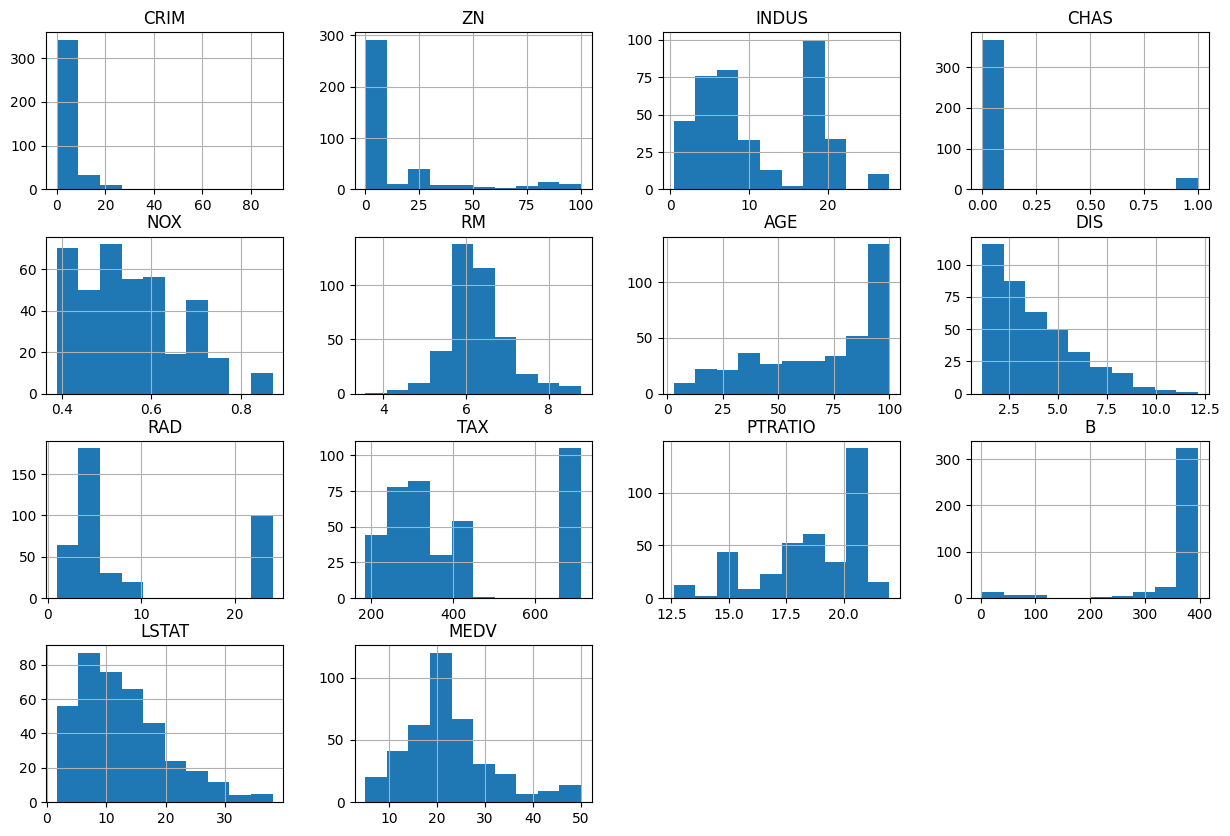

In [21]:
Data_Read.hist(figsize=(15,10))

<Axes: >

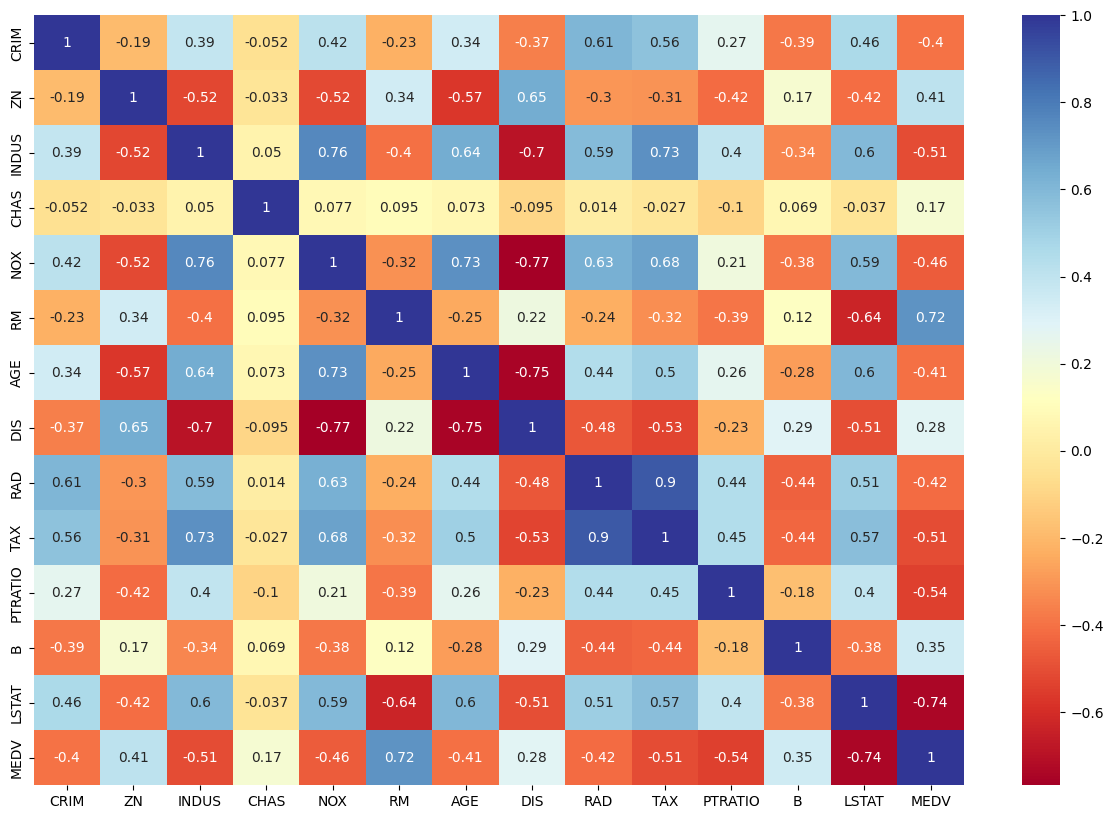

In [34]:
#Plot corrolation between the features and MEDV
plt.figure(figsize =(15,10))
sns.heatmap(Data_Read.corr(), annot=True, cmap="RdYlBu")

In [39]:
# Since the CHAS is not a very corrolated feature to any of the other feature plus it is not significatntly affecting the MEDV we can drop it out
Data_Read.drop("CHAS", axis=1, inplace=True)

In [40]:
Data_Read

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006300,2.944439,2.31,0.538,6.575,4.192680,4.0900,0.693147,5.693732,15.3,5.986201,4.98,24.0
1,0.026944,0.000000,7.07,0.469,6.421,4.380776,4.9671,1.098612,5.493061,17.8,5.986201,9.14,21.6
2,0.026924,0.000000,7.07,0.469,7.185,4.128746,4.9671,1.098612,5.493061,17.8,5.975919,4.03,34.7
3,0.031857,0.000000,2.18,0.458,6.998,3.845883,6.0622,1.386294,5.407172,18.7,5.980479,2.94,33.4
5,0.029413,0.000000,2.18,0.458,6.430,4.089332,6.0622,1.386294,5.407172,18.7,5.979190,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.163674,0.000000,9.69,0.585,5.569,4.310799,2.3999,1.945910,5.971262,19.2,5.983357,15.10,17.5
500,0.202435,0.000000,9.69,0.585,6.027,4.390739,2.4982,1.945910,5.971262,19.2,5.986201,14.33,16.8
502,0.044275,0.000000,11.93,0.573,6.120,4.352855,2.2875,0.693147,5.613128,21.0,5.986201,9.08,20.6
503,0.058986,0.000000,11.93,0.573,6.976,4.521789,2.1675,0.693147,5.613128,21.0,5.986201,5.64,23.9


<Axes: >

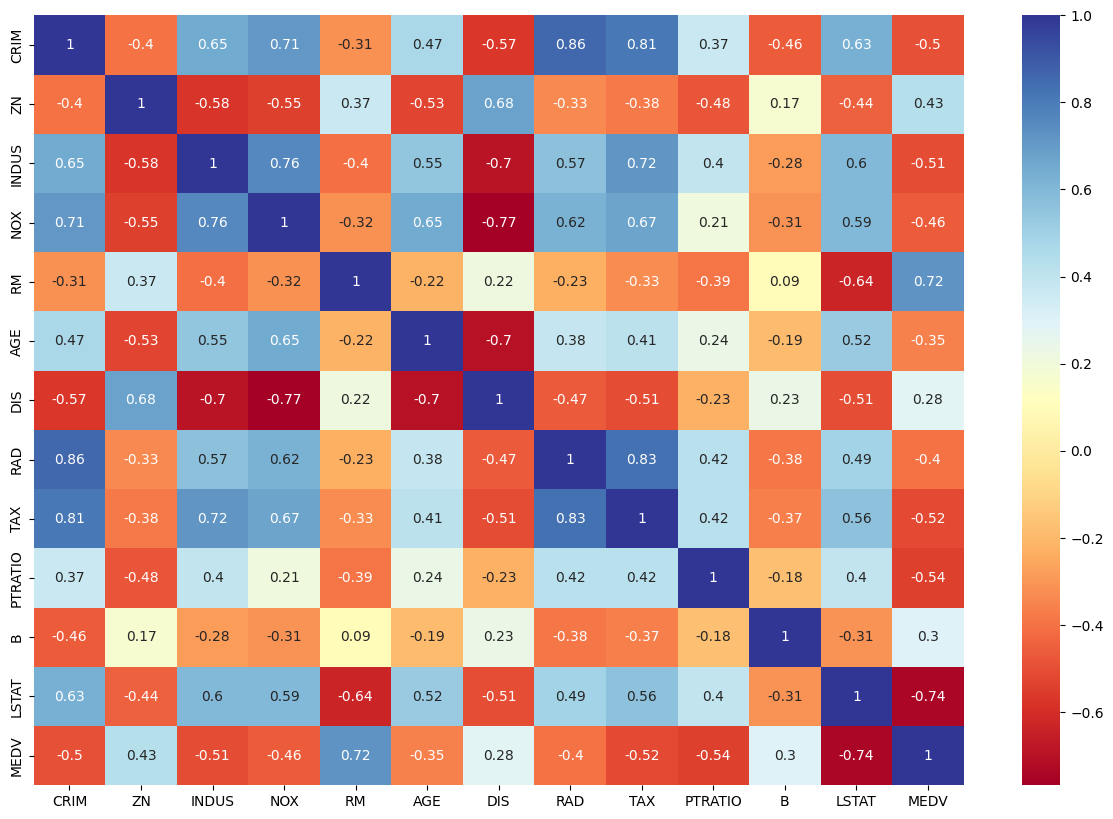

In [41]:
#Plot corrolation between the features and MEDV
plt.figure(figsize =(15,10))
sns.heatmap(Data_Read.corr(), annot=True, cmap="RdYlBu")

In [43]:
# Use a Linear regression model

# The training data should include all columns corresponding to features except the last column which correspond to the mean value of house cost
Train_set=Data_Read.drop(["MEDV"], axis=1)
# The Output labels for training is the mean value of house cost
Train_label=Data_Read["MEDV"]

In [44]:
Train_set

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006300,2.944439,2.31,0.538,6.575,4.192680,4.0900,0.693147,5.693732,15.3,5.986201,4.98
1,0.026944,0.000000,7.07,0.469,6.421,4.380776,4.9671,1.098612,5.493061,17.8,5.986201,9.14
2,0.026924,0.000000,7.07,0.469,7.185,4.128746,4.9671,1.098612,5.493061,17.8,5.975919,4.03
3,0.031857,0.000000,2.18,0.458,6.998,3.845883,6.0622,1.386294,5.407172,18.7,5.980479,2.94
5,0.029413,0.000000,2.18,0.458,6.430,4.089332,6.0622,1.386294,5.407172,18.7,5.979190,5.21
...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.163674,0.000000,9.69,0.585,5.569,4.310799,2.3999,1.945910,5.971262,19.2,5.983357,15.10
500,0.202435,0.000000,9.69,0.585,6.027,4.390739,2.4982,1.945910,5.971262,19.2,5.986201,14.33
502,0.044275,0.000000,11.93,0.573,6.120,4.352855,2.2875,0.693147,5.613128,21.0,5.986201,9.08
503,0.058986,0.000000,11.93,0.573,6.976,4.521789,2.1675,0.693147,5.613128,21.0,5.986201,5.64


In [45]:
Train_label

0      24.0
1      21.6
2      34.7
3      33.4
5      28.7
       ... 
499    17.5
500    16.8
502    20.6
503    23.9
504    22.0
Name: MEDV, Length: 394, dtype: float64

In [46]:
# Make an 80% for training and 20% for testing
X_train, X_test , y_train, y_test =train_test_split(Train_set,Train_label, test_size=0.2)

In [47]:
reg_model=LinearRegression()

In [48]:
# Train the model
reg_model.fit(X_train,y_train)

LinearRegression()

In [50]:
reg_model.score(X_test,y_test)

0.7356810396685283

In [52]:
# 1. Make predictions on the test set
y_pred_test = reg_model.predict(X_test)

# 2. Calculate MSE and RMSE
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

# Print or use the MSE and RMSE values
print(f"Test MSE: {mse_test:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")

Test MSE: 23.60
Test RMSE: 4.86


In [92]:
for i in range (len(X_test)):
  predictions = reg_model.predict(X_test.iloc[[i]])
  print("The expexted price is: " ,predictions)

The expexted price is:  [27.79457532]
The expexted price is:  [26.60404573]
The expexted price is:  [13.2716165]
The expexted price is:  [25.58541359]
The expexted price is:  [19.85220626]
The expexted price is:  [22.73545543]
The expexted price is:  [18.08756857]
The expexted price is:  [21.94001542]
The expexted price is:  [9.54506205]
The expexted price is:  [23.01382334]
The expexted price is:  [19.80396169]
The expexted price is:  [17.21153322]
The expexted price is:  [17.92008735]
The expexted price is:  [15.57954332]
The expexted price is:  [9.19134362]
The expexted price is:  [13.09424495]
The expexted price is:  [21.18758416]
The expexted price is:  [23.6308747]
The expexted price is:  [17.2652913]
The expexted price is:  [22.9181277]
The expexted price is:  [14.23824902]
The expexted price is:  [33.01538998]
The expexted price is:  [22.22272782]
The expexted price is:  [19.54546098]
The expexted price is:  [34.4153738]
The expexted price is:  [10.79178359]
The expexted price 

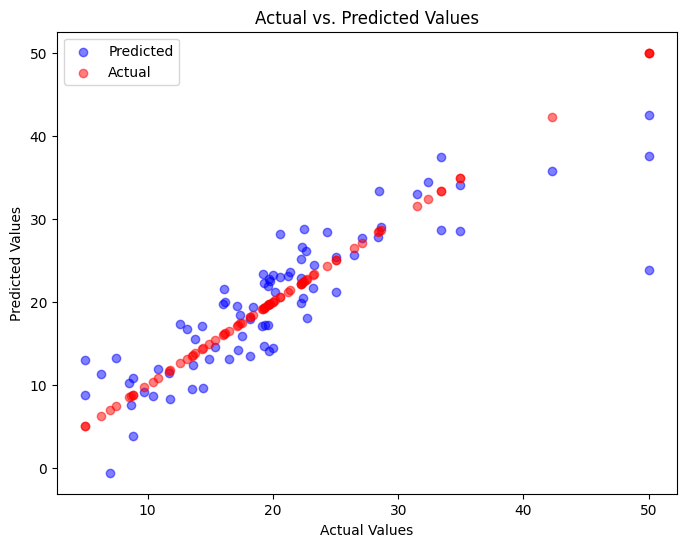

In [94]:
# Create a scatter plot for actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, c='blue', label='Predicted', alpha=0.5)
plt.scatter(y_test, y_test, c='red', label='Actual', alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

In [97]:
# Try it in Random Forest Model for a higher score
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor()

forest.fit(X_train, y_train)


RandomForestRegressor()

In [98]:
forest.score(X_test, y_test)

0.9122184536064014

In [107]:
# Use validation to evaluate the model
from sklearn.model_selection import GridSearchCV

forest=RandomForestRegressor()

Par_Grid={
    "n_estimators":[100,200,300],
    "min_samples_split":[2,4],
    "max_depth": [None, 4, 8]
}

grid_search=GridSearchCV(forest, Par_Grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [108]:
bestforest=grid_search.best_estimator_

In [109]:
bestforest.score(X_test, y_test)

0.9122384238351757

In [110]:
# 1. Make predictions on the test set
y_pred_test = bestforest.predict(X_test)

# 2. Calculate MSE and RMSE
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

# Print or use the MSE and RMSE values
print(f"Test MSE: {mse_test:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")

Test MSE: 7.84
Test RMSE: 2.80


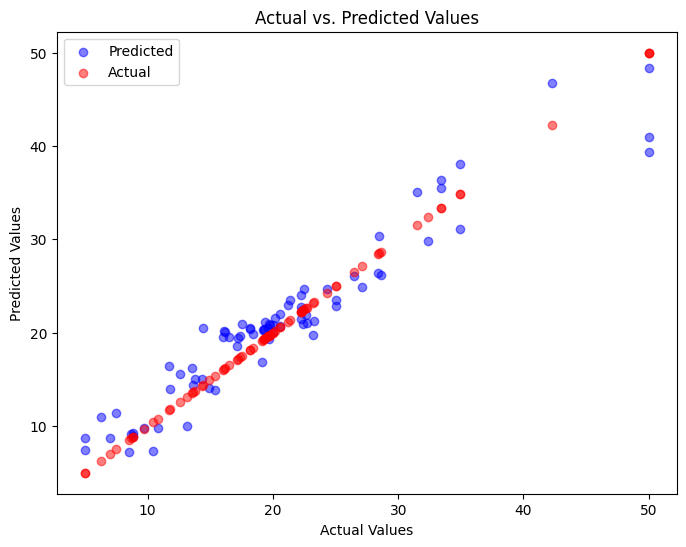

In [111]:
# Create a scatter plot for actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, c='blue', label='Predicted', alpha=0.5)
plt.scatter(y_test, y_test, c='red', label='Actual', alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

In [112]:
for i in range (len(X_test)):
  predictions = bestforest.predict(X_test.iloc[[i]])
  print("The expexted price is: " ,predictions)

The expexted price is:  [26.3558996]
The expexted price is:  [22.48119429]
The expexted price is:  [11.38416178]
The expexted price is:  [26.09786442]
The expexted price is:  [21.45583241]
The expexted price is:  [20.95655198]
The expexted price is:  [21.02292879]
The expexted price is:  [20.50475569]
The expexted price is:  [16.20690026]
The expexted price is:  [20.69780384]
The expexted price is:  [19.5686381]
The expexted price is:  [21.18101111]
The expexted price is:  [20.45339691]
The expexted price is:  [15.07913876]
The expexted price is:  [9.81573823]
The expexted price is:  [19.59004365]
The expexted price is:  [21.54912566]
The expexted price is:  [23.54551926]
The expexted price is:  [19.64578955]
The expexted price is:  [22.76440608]
The expexted price is:  [19.45851215]
The expexted price is:  [35.10851133]
The expexted price is:  [20.43460648]
The expexted price is:  [18.62682103]
The expexted price is:  [29.8583664]
The expexted price is:  [8.92105398]
The expexted pric

In [113]:
sample_input = {
    "CRIM": [0.02731],    # Per capita crime rate by town
    "ZN": [0.0],          # Proportion of residential land zoned for large lots
    "INDUS": [7.07],      # Proportion of non-retail business acres per town
    "NOX": [0.469],       # Nitrogen oxides concentration (parts per 10 million)
    "RM": [6.421],        # Average number of rooms per dwelling
    "AGE": [78.9],        # Proportion of owner-occupied units built before 1940
    "DIS": [4.9671],      # Weighted distance to employment centers
    "RAD": [2],           # Accessibility to radial highways
    "TAX": [242],         # Property tax rate (per $10,000)
    "PTRATIO": [17.8],    # Pupil-teacher ratio by town
    "B": [396.9],         # Proportion of residents of African American descent
    "LSTAT": [9.14]       # Percentage of lower status population
}

# Create a DataFrame
sample_input_df = pd.DataFrame(sample_input)
sample_input_df

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14


In [115]:
# Assuming 'new_data' is your preprocessed input data
predictions = bestforest.predict(sample_input_df)
print("The expected cost is:", predictions)

The expected cost is: [21.30225476]
